In [2]:
#Setup A
actual_a = [1 for n in range(10)] + [0 for n in range(10)]
predicted_a = [1 for n in range(9)] + [0, 1, 1] + [0 for n in range(8)]
print(actual_a)
print(predicted_a)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]


In [3]:
#Setup B
actual_b = [1 for n in range(10)] + [2 for n in range(10)] + [3 for n in range(10)]
predicted_b = [1 for n in range(8)] + [2, 3] + [2 for n in range(8)] + [1, 1] + [3 for n in range(9)] + [2]
print(actual_b)
print(predicted_b)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2]


In [4]:
#Setup C
actual_c = [c for m in [[n, n, n] for n in range(10)] for c in m]
predicted_c = [c for m in [[n, max((n-1), 0), n] for n in range(10)] for c in m]
print(actual_c)
print(predicted_c)

[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9]
[0, 0, 0, 1, 0, 1, 2, 1, 2, 3, 2, 3, 4, 3, 4, 5, 4, 5, 6, 5, 6, 7, 6, 7, 8, 7, 8, 9, 8, 9]


In [5]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

def my_confusion_matrix(actual, predicted):
    true_positives = len([a for a, p in zip(actual, predicted) if a == p and p == 1])
    true_negatives = len([a for a, p in zip(actual, predicted) if a == p and p == 0])
    false_positives = len([a for a, p in zip(actual, predicted) if a != p and p == 1])
    false_negatives = len([a for a, p in zip(actual, predicted) if a != p and p == 0])
    return "[[{} {}]\n  [{} {}]]".format(true_negatives, false_positives, false_negatives, true_positives)

print("my Confusion Matrix A:\n", my_confusion_matrix(actual_a, predicted_a))
print("sklearn Confusion Matrix A:\n", confusion_matrix(actual_a, predicted_a))

my Confusion Matrix A:
 [[8 2]
  [1 9]]
sklearn Confusion Matrix A:
 [[8 2]
 [1 9]]


In [6]:
# Accuracy
from sklearn.metrics import accuracy_score

# Accuracy = TP + TN / TP + TN + FP + FN
def my_accuracy_score(actual, predicted): #threshold for non-classification?  
    true_positives = len([a for a, p in zip(actual, predicted) if a == p and p == 1])
    true_negatives = len([a for a, p in zip(actual, predicted) if a == p and p == 0])
    false_positives = len([a for a, p in zip(actual, predicted) if a != p and p == 1])
    false_negatives = len([a for a, p in zip(actual, predicted) if a != p and p == 0])
    return (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)

# Accuracy for non-binary predictions
def my_general_accuracy_score(actual, predicted):
    correct = len([a for a, p in zip(actual, predicted) if a == p])
    wrong = len([a for a, p in zip(actual, predicted) if a != p])
    return correct / (correct + wrong)

# Accuracy for continuous with threshold
def my_threshold_accuracy_score(actual, predicted, threshold):
    a = [0 if x >= threshold else 1 for x in actual]
    p = [0 if x >= threshold else 1 for x in predicted]
    return my_accuracy_score(a, p)

print("my Accuracy A:", my_accuracy_score(actual_a, predicted_a))
print("sklearn Accuracy A:", accuracy_score(actual_a, predicted_a))
print("my Accuracy B:", my_general_accuracy_score(actual_b, predicted_b))
print("sklearn Accuracy B:", accuracy_score(actual_b, predicted_b))
print("my Accuracy C:", my_threshold_accuracy_score(actual_c, predicted_c, 5))

my Accuracy A: 0.85
sklearn Accuracy A: 0.85
my Accuracy B: 0.8333333333333334
sklearn Accuracy B: 0.8333333333333334
my Accuracy C: 0.9666666666666667


In [7]:
#Precision
from sklearn.metrics import precision_score

# Precision = TP / TP + FP
def my_precision_score(actual, predicted):
    true_positives = len([a for a, p in zip(actual, predicted) if a == p and p == 1])
    false_positives = len([a for a, p in zip(actual, predicted) if a != p and p == 1])
    return true_positives / (true_positives + false_positives)

def my_general_precision_score(actual, predicted, value):
    true_positives = len([a for a, p in zip(actual, predicted) if a == p and p == value])
    false_positives = len([a for a, p in zip(actual, predicted) if a != p and p == value])
    return true_positives / (true_positives + false_positives)

print("my Precision A:", my_precision_score(actual_a, predicted_a))
print("sklearn Precision A:", precision_score(actual_a, predicted_a))
print("my Precision B:", my_general_precision_score(actual_b, predicted_b, 2))

my Precision A: 0.8181818181818182
sklearn Precision A: 0.8181818181818182
my Precision B: 0.8


In [20]:
#Recall
from sklearn.metrics import recall_score

def my_recall_score(actual, predicted):
    true_positives = len([a for a, p in zip(actual, predicted) if a == p and p == 1])
    false_negatives = len([a for a, p in zip(actual, predicted) if a != p and p == 0])
    return true_positives / (true_positives + false_negatives)

def my_general_recall_score(actual, predicted, positive, negative):
    true_positives = len([a for a, p in zip(actual, predicted) if a == p and p == positive])
    false_negatives = len([a for a, p in zip(actual, predicted) if a != p and p == negative])
    return true_positives / (true_positives + false_negatives)

print("my Recall A:", my_recall_score(actual_a, predicted_a))
print("sklearn Recall A:", recall_score(actual_a, predicted_a))

my Recall A: 0.9
sklearn Recall A: 0.9


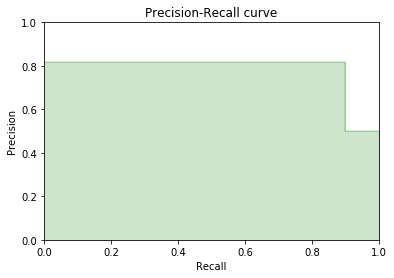

In [12]:
#Precision-Recall
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(actual_a, predicted_a)
plt.step(recall, precision, color='g', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='g', step='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.show()

In [19]:
#F1 Score
from sklearn.metrics import f1_score

def my_f1_score(actual, predicted):
    return 2 * (my_precision_score(actual, predicted) * my_recall_score(actual, predicted)) / (my_precision_score(actual, predicted) + my_recall_score(actual, predicted))

print("my F1 Score A:", my_f1_score(actual_a, predicted_a))
print("sklearn F1 Score A:", f1_score(actual_a, predicted_a))

my F1 Score A: 0.8571428571428572
sklearn F1 Score A: 0.8571428571428572


sklearn ROC AUC Score A: 0.85


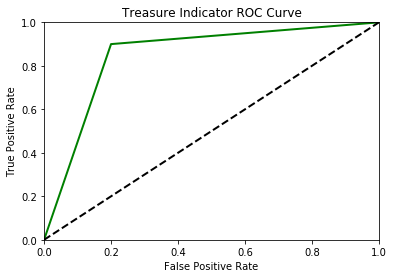

In [16]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

print("sklearn ROC AUC Score A:", roc_auc_score(actual_a, predicted_a))
fpr, tpr, _ = roc_curve(actual_a, predicted_a)
plt.figure()
plt.plot(fpr, tpr, color='green',
         lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--') #center line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Treasure Indicator ROC Curve')
plt.show()